In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
#x_train[0]

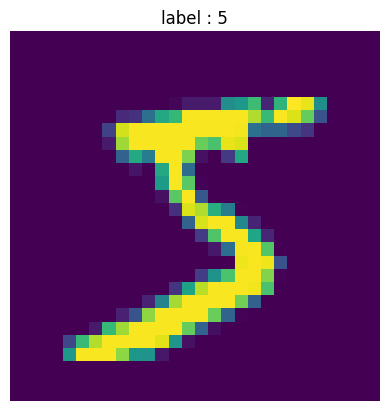

In [6]:
plt.imshow(x_train[0])
plt.title(f"label : {y_train[0]}")
plt.axis('off')
plt.show()

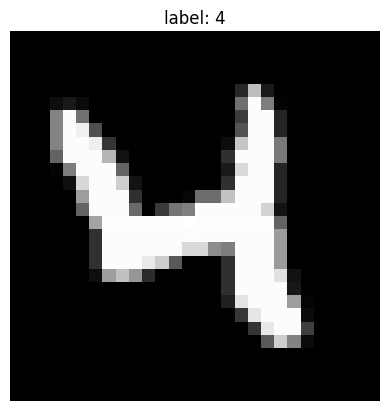

In [7]:
plt.imshow(x_train[20], cmap = 'gray')
plt.title(f"label: {y_train[20]}")
plt.axis("off")
plt.show()

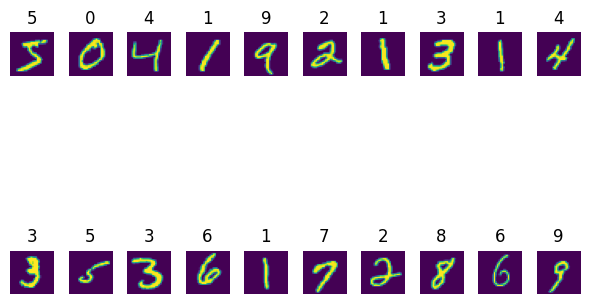

In [8]:
plt.figure(figsize=(6,6))
for i in range(20):
    plt.subplot(2,10, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

***Normalizations***

In [9]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

***Neural Network Architecture***

In [10]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (28*28,)),    #input layer
    Dense(64, activation = 'relu'),                             #Hidden layer
    Dense(10, activation = 'softmax')                           #output layer
])

***Compile the model***

In [11]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

***Train the model***

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.25)
#Batch size : a batch size of 32 means that 32 samples are used to compute the gradient and update the model weights before the next batch of 32 samples processed
#Number of epochs : The number of times the entire trainning dataset is passed through the model.

Epoch 1/10
1407/1407 [==============================] - 8s 4ms/step - loss: 0.2638 - accuracy: 0.9223 - val_loss: 0.1472 - val_accuracy: 0.9571
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1112 - accuracy: 0.9670 - val_loss: 0.1082 - val_accuracy: 0.9676
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.1138 - val_accuracy: 0.9665
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.1019 - val_accuracy: 0.9701
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.1044 - val_accuracy: 0.9712
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.1035 - val_accuracy: 0.9727
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.1272 - val_accuracy:

***Evalute the model's performance on the test data***

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test accuracy : {test_accuracy}")
print(f"\n Test Loss : {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9742

 Test accuracy : 0.9742000102996826

 Test Loss : 0.10675989091396332


***Predict on the test set***

In [14]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.9608155e-10, 4.0926699e-07, 9.3908319e-08, ..., 9.9945039e-01,
        2.2822466e-08, 5.2638882e-04],
       [5.9627377e-12, 1.1106372e-09, 1.0000000e+00, ..., 2.6790525e-13,
        2.4998027e-12, 6.2859809e-22],
       [2.4787132e-09, 9.9999690e-01, 5.1738748e-08, ..., 5.7077244e-07,
        2.4229794e-06, 4.0544537e-10],
       ...,
       [3.1250238e-16, 7.1702214e-11, 5.8723790e-15, ..., 1.9722969e-12,
        2.7175381e-13, 1.8641466e-10],
       [6.3211072e-16, 1.3744881e-14, 4.5983396e-16, ..., 5.2183191e-16,
        8.8096030e-11, 2.0897277e-15],
       [2.1415961e-14, 4.4449919e-10, 6.8422861e-16, ..., 1.2673867e-16,
        1.2025082e-16, 4.4390563e-12]], dtype=float32)

In [15]:
y_pred_classes = np.argmax(y_pred, axis=1) #convert probabilities to class Labels
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 971    0    1    0    0    1    3    1    2    1]
 [   0 1130    0    0    0    0    2    0    3    0]
 [   3    1 1005    5    1    0    5    5    7    0]
 [   1    0    6  994    0    1    0    2    4    2]
 [   0    2    6    0  954    1    9    2    0    8]
 [   4    0    0   16    1  854    7    2    3    5]
 [   4    2    2    1    3    4  942    0    0    0]
 [   1    9   13    4    4    0    0  986    2    9]
 [   5    1    2    8    3    5    3    4  939    4]
 [   2    9    1   11    7    2    1    4    5  967]]


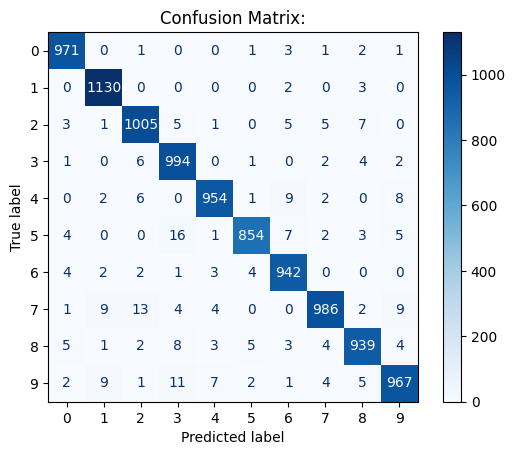

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix:')
plt.show()

***Save the model***

In [18]:
model.save('tf_model.h5')

C:\Users\User\.conda\envs\my_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
loaded_model = tf.keras.models.load_model('tf_model.h5')
loaded_model

1/1 [==============================] - 0s 39ms/step
True label: 9
Predicted_label:9


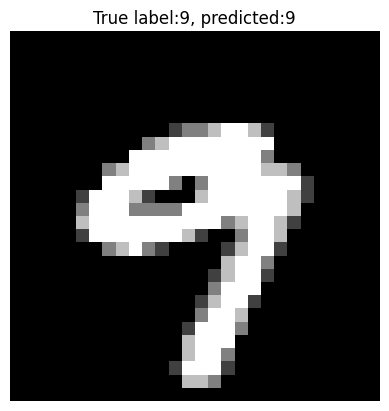

In [22]:
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]

random_image_reshaped = random_image.reshape(1, 28*28)
predictions = loaded_model.predict(random_image_reshaped)
predicted_label = np.argmax(predictions)

print(f"True label: {random_label}")
print(f"Predicted_label:{predicted_label}")

plt.imshow(random_image.reshape(28,28), cmap='gray')
plt.title(f"True label:{random_label}, predicted:{predicted_label}")
plt.axis('off')
plt.show()